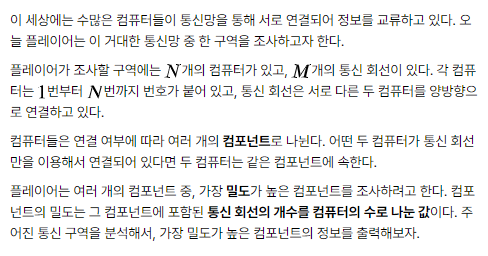

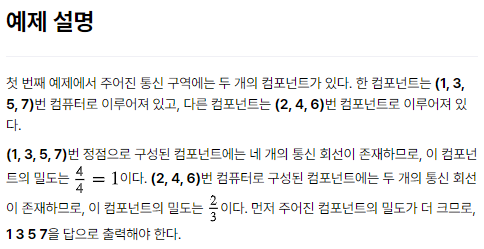

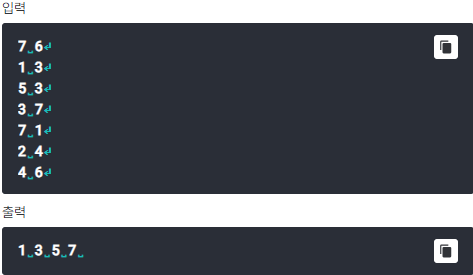

In [ ]:
# My Code : error
from collections import deque
import numpy as np
N, M = map(int, input().split())
line = [[0] for _ in range(N+1)]

for _ in range(M):
	sn, en = map(int, input().split())
	line[sn].append(en)
	line[en].append(sn)

visited = [[0] for _ in range(N + 1)]
compolst = [0]

for i in range(1, N +1):
	compo = []
	if visited[i] != 1:
		compo.append(i)
		q = deque([i])
	while q:
		strt = q.popleft()
		for k in line[i]:
			if visited[k] != 0:
				visited[k] = 1
				q.append(k)
				compo.append(k)
			else:
				continue
	compolst.append(compo)

print(compolst)

sunnum = [0]
comnumlst = [1]
for c in compolst[1:]:
	comnum = len(c)
	num = 0
	for i in c:
		num += len(line[i])
	sunnum.append(num)
	comnumlst.append(comnum)

mildo = [x / y for x, y in zip(sunnum, comnumlst)]
maxnum = max(mildo)
if mildo.count(maxnum) > 1:
	maxidx = [i for i, value in enumerate(mildo) if value == maxnum]
	alst = []
	for k in maxidx:
		b = float('inf')
		a = len(compolst[k])
		alst.append(a)
		c = min(a,b)
		if c == a:
			l = k
		b = a
	if alst.count(c) == 1 :
		print(sorted(compolst[l]))
	else :
		finidx = [q for q, val in enumerate(alst) if val == c]
		for b in finidx[1:]:
			z = min(compolst[b])
			l = float('inf')
			t = min(z,l)
			l = t
			if  z ==  t:
				print(compolst[b])
else:
	k = np.argmax(mildo)
	rst = sorted(compolst[k])
	print(rst)

1.  컴포넌트에 속한 컴퓨터의 수
2. 컴포넌트에 속한 통신 회선의 수
3. 컴포넌트에서 가장 작은 컴퓨터의 번호

In [ ]:
# Answer Code
from collections import deque

def bfs(start):
	q = deque([start])
	component = set()

	while q:
		now = q.popleft()

		if visited[now]:
			continue

		visited[now] = 1
		component.add(now)

		for to in graph[now]:
			if not visited[to]:
				q.append(to)

	edge = 0

	for i in component:
		for to in graph[i]:
			if to in component:
				edge += 1

	return sorted(list(component)), edge / len(component)

N, M = map(int, input().split())
graph = [[] for _ in range(N + 1)]
visited = [0] * (N + 1)

for _ in range(M):
	a, b = map(int, input().split())
	graph[a].append(b)
	graph[b].append(a)

result, density = [], 0

for i in range(1, N + 1):
	if not visited[i]:
		temp, tempDensity = bfs(i)

		if abs(tempDensity - density) < 1e-8:
			if len(result) > len(temp):
				result = temp
				density = tempDensity
			elif len(result) == len(temp):
				if temp[0] < result[0]:
					result = temp
					density = tempDensity
		elif tempDensity > density:
			result = temp
			density = tempDensity

print(*result)

In [ ]:
	# 간선의 수를 저장할 변수를 선언합니다.
	edge = 0

	# 컴포넌트에 속한 모든 컴퓨터에 대해 순회할게요.
	for i in component:
		# 도달 가능한 컴퓨터 중에서,
		for to in graph[i]:
			# 그 컴퓨터가 현재 컴포넌트에 속한다면, 컴포넌트 내부의 통신 회선입니다.
			if to in component:
				edge += 1

### 집합의 hashing
- if to in component : 에서 component를 list형으로 선언했다면, 이 부분에서 시간이 많이 걸리게 된다. 리스트에 대한 in 연산은 최악의 경우 리스트 크기 만큼의 시간이 걸린다. 하지만 집합으로 선언하면 해싱이라는 원리에 의해서 상수 시간이 걸린다.

In [ ]:
'''
실수값끼리 == 를 이용해 비교하는 것은 아주 위험합니다! 따라서 아래와 같은 방법을 사용해요.
두 실수값의 차이가 어떤 작은값보다 작다면, 같은 값으로 간주하겠다는 의미가 됩니다.
여기서 abs는 절댓값 함수입니다. tempDensity와 density중 어느 것이 큰지 모르기 때문에 사용합니다.
두 값의 차이가 1e-8보다 작으면 같다고 생각할게요.
1e-8 은 10^(-8)과 같습니다.
'''
		if abs(tempDensity - density) < 1e-8:
			# 밀도가 같으면 실행하는 부분입니다. 2번 조건을 확인해 줄게요.
			# 만약 현재 저장해둔 컴포넌트 배열이 더 크면 BFS의 결과값으로 교체합니다.
			if len(result) > len(temp):
				result = temp
				density = tempDensity
			# 만약 컴포넌트 배열 크기가 같은 경우, 3번 조건을 확인해줍니다.
			elif len(result) == len(temp):
				# 각각은 정렬된 배열이므로 첫번째 값을 비교해주면 되겠죠?
				# temp의 가장 작은 컴퓨터가 result의 값보다 작으면 갱신해줍니다.
				if temp[0] < result[0]:
					result = temp
					density = tempDensity
		# 두 컴포넌트의 밀도가 다른 경우 1번 조건을 고려합니다.
		elif tempDensity > density:
			result = temp
			density = tempDensity

## python의 부동 소수점 비교 : 실수값끼리의 대소 비교 => 실수값 오차
> 부동 소수점 : 부동 소수점 숫자는 소수점 이하의 위치가 고정되어 있지 않고, 숫자의 위치를 나타내기 위한 지수 부분을 사용하여 표현됩니다.
- 부동 소수점 표현은 정수 부분과 소수 부분으로 나누어지며, 지수를 사용하여 소수점의 위치를 조절합니다. 예를 들어, 123.45를 32비트 부동 소수점으로 표현한다면 대략적으로 다음과 같이 될 수 있습니다:
- 1.2345 x 10^2

- tempDensity와 density는 실수 값으로 가정되어 있습니다. 일반적으로 컴퓨터에서는 부동 소수점 연산이 정확하지 않을 수 있으며, 실수 값의 비교 시에는 반드시 주의해야 합니다.
- 이러한 부동 소수점 정밀도 문제로 인해 두 실수 값이 완전히 같은지 비교하는 것은 까다로울 수 있습니다.

- 예를 들어, 아래와 같은 경우가 있을 수 있습니다.

```python
a = 0.1 + 0.2
b = 0.3
print(a == b)
```

- 이 경우, a와 b는 수학적으로는 같지만, 부동 소수점 정밀도 문제로 인해 a == b는 False를 반환할 수 있습니다.

- 따라서, 이러한 부동 소수점 정밀도 문제를 해결하기 위해 == 대신에 일정한 오차 범위 내에서의 비교를 하는 것이 좋습니다. 코드에서 사용된 abs(tempDensity - density) < 1e-8는 이러한 오차 범위를 설정한 것입니다. 이렇게 하면 두 실수 값이 오차 범위 내에 있으면 같은 것으로 간주합니다.

- 만약 ==을 사용하여 비교한다면, 부동 소수점 정밀도 문제로 인해 예상치 못한 결과가 발생할 수 있습니다. 부동 소수점 비교에는 항상 주의가 필요합니다.

> 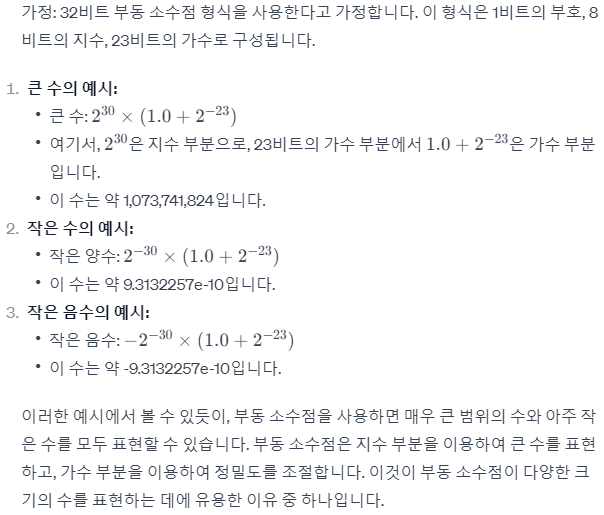

> print(*result)

- 반복 가능한 자료형을 출력할 때 *을 붙여서 print에 넣으면 양끝 괄호와 쉽표를 제거하고, 자료 내부에 포함된 원소들을 공백으로 구분하여 출력해준다.



```python
a = [1, 2, 3]
print(a)  # [1, 2, 3]
print(*a) # 1 2 3

b = (1, 2, 3)
print(b)  # (1, 2, 3)
print(*b) # 1 2 3

c = [[1], [2], [3]]
print(c)  # [[1], [2], [3]]
print(*c) # [1] [2] [3]
```



In [ ]:
import numpy as np
a= [1,2,3,4,4]
b = max(a)
a.count(b)

2

In [ ]:
a = [0, 0, 1, 1, 0, 1]

indices_of_ones = [index for index, value in enumerate(a) if value == 1]

print(indices_of_ones)


네, `enumerate` 함수가 없으면 코드가 작동하지 않습니다. `enumerate` 함수는 순회 가능한(iterable) 객체(여기서는 리스트 `a`)의 각 요소와 해당 요소의 인덱스를 함께 제공합니다.

`enumerate`를 사용하지 않고 같은 결과를 얻으려면 인덱스를 직접 추적하면서 코드를 작성해야 합니다. 다음은 `enumerate`를 사용하지 않고 인덱스를 추적하여 같은 결과를 얻는 코드의 예시입니다:

```python
a = [0, 0, 1, 1, 0, 1]

indices_of_ones = [index for index in range(len(a)) if a[index] == 1]

print(indices_of_ones)
```

여기서 `range(len(a))`는 리스트 `a`의 길이에 해당하는 범위를 생성하며, 각 인덱스에 대해 리스트의 값을 확인하여 값이 1인 경우에만 해당 인덱스를 결과로 저장합니다. 그러나 이 방법은 `enumerate`를 사용한 코드보다 불필요하게 코드가 길어지고 가독성이 떨어집니다. 따라서 `enumerate`를 사용하는 것이 효율적이고 권장되는 방법입니다.

In [ ]:
from collections import deque
q = deque([1])
q

deque([1])

- Handshaking Lemma